# Mapping the use of GAI in a higher educational context

!["Pandora opening the box" by John William Waterhouse](images/PandoraPainting.jpg)

## Introduction
This notebook presents the data analysis and statistical methods applied in the research project "Mapping the Use of Generative Artificial Intelligence (GAI) in a Higher Educational Context," conducted at Lyon College between August and November 2024. The aim of this study is to investigate the prevalence, frequency, and purposes for which students utilize GAI tools in their academic activities. Given the rapid integration of AI technologies in educational settings, understanding how students interact with these tools is essential for assessing potential impacts on learning, academic integrity, and institutional policies.

The data used in this analysis includes survey responses from a diverse sample of Lyon College students (n = 171), capturing various academic disciplines and backgrounds. This notebook details the steps of data cleaning, exploratory analysis, and statistical testing to identify trends and insights related to GAI usage. Specifically, we focus on differences in AI usage across academic disciplines, as well as between domestic and international students, to shed light on how these factors influence engagement with GAI technologies.

## Limitations
The primary limitation of this study is its relatively small sample size (n = 171), which may limit the generalizability of findings across a broader student population. However, the study’s objective was to specifically explore generative AI use within a small college setting, with a student population under 1,000, an environment that differs significantly from larger universities in terms of student-professor interactions, classroom size, and access to resources. 

Despite its modest size, the sample represents approximately 25% of the total student body at Lyon College, providing valuable insights into a substantial portion of this unique academic community. This context-sensitive focus allows the study to shed light on AI use patterns that might not be as prevalent or observable in larger educational institutions.

## Survey Structure and Study Goals
The survey was designed with 7 straightforward questions to gather insights efficiently:

- Are you a native or non-native English speaker? (Yes or No answer)

- What is your principal field of study? (Select from the provided list of fields of study)

- Have you ever heard of Artificial Intelligence (AI) tools, such as ChatGPT, Grammarly, Claude, etc.? (Yes or No answer)

- Do you use AI tools (e.g., ChatGPT, Grammarly, or any other AI tool) in your academic life? (Yes or No answer)

- How frequently do you use AI tools (e.g., ChatGPT, Grammarly, Claude, etc.)? (Likert scale from 1 to 5, representing frequency)

- For which specific purposes do you use these AI tools? (Select all applicable purposes)

- Which AI tool do you use most frequently? (Select all that apply)


The survey was intentionally kept brief and accessible to encourage maximum participation and reduce the time burden on respondents, thereby improving the likelihood of a higher response rate. The 7 questions were crafted to directly address the primary objectives of the study, which include:

1. *Proportion of Student Engagement with Generative AI*: What percentage of students are using Generative AI in their academic activities?

2. *Frequency of Generative AI Use*: How often do students at Lyon College use Generative AI tools in their academic pursuits? (e.g., daily, weekly, occasionally)

3. *Academic Purposes for AI Use*: For which academic tasks or goals are students using Generative AI? (e.g., completing assignments, enhancing study practices, generating creative content)

4. *Most Commonly Used AI Tools*: Which Generative AI tools are preferred or most frequently used by students?

5. *Prevalence of AI Use Across Disciplines*: In which academic disciplines is the usage of Generative AI most common among students?

By focusing on these questions, the study aims to capture a clear picture of how, why, and to what extent students at a small college are integrating Generative AI into their academic lives.

**Let's jump into the code now!**

import the core libraries we'll use for data analysis, visualization, and statistical testing. These libraries allow us to handle data efficiently, create visualizations, and perform statistical analyses to interpret our findings.

In [1193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

Load the survey data into a DataFrame. 

Each column in the DataFrame corresponds to a survey question, as outlined in the introduction section.

In [1194]:
df = pd.read_csv("Mapping the use of AI  (Responses) - Form Responses 2.csv")
df.head()

,Timestamp,Are you a native or non-native English speaker?,What is your principal field of study?,"Have you ever heard of Artificial Intelligence (AI) tools, such as ChatGPT, Grammarly, Claude, etc.?","Do you use AI tools (such as ChatGPT, Grammarly, or any other AI tool) in your academic life? Please answer 'Yes' even if you use them only rarely; you will have the opportunity to specify how often in the next question.","How frequently do you use AI tools (e.g., ChatGPT, Grammarly, Claude, etc.)? A rating of 1 indicates very rare use, while a rating of 5 indicates daily use. Higher numbers represent more frequent usage.",For which specific purposes do you use these AI tools? (Select all that apply),Which AI tool do you use most frequently? (Select all that apply),Do you consent to participate in this study?
0,9/18/2024 18:51:09,Native English Speaker,Business Administration,Yes,Yes,1.0,Proofreading and Grammar Checking,ChatGPT,NaN
1,9/23/2024 20:58:23,Native English Speaker,Computer Science,Yes,Yes,3.0,"Proofreading and Grammar Checking, Generating ...","ChatGPT, Snapchat AI",I do consent
2,9/23/2024 21:39:37,Non-Native English Speaker,Data Science,Yes,Yes,4.0,"Proofreading and Grammar Checking, Generating ...","ChatGPT, Grammarly",I do consent
3,9/24/2024 16:30:57,Non-Native English Speaker,Computer Science,Yes,Yes,3.0,"Completing Assignments, Proofreading and Gramm...","ChatGPT, Grammarly",I do consent
4,9/24/2024 18:03:13,Native English Speaker,Exercise Science,Yes,No,1.0,NaN,NaN,I do consent


Now we rename the columns of the DataFrame to make them more concise and easier to work with during analysis. Clear and consistent column names simplify our code and improve readability, especially as we perform various operations on the data throughout the analysis.

In [1195]:
# Remove all spaces from columns name first
df.columns = df.columns.str.strip()


# Rename the colmuns
df = df.rename(columns={"Are you a native or non-native English speaker?": "Language",
                        "What is your principal field of study?": "Field_of_study",
                        "Have you ever heard of Artificial Intelligence (AI) tools, such as ChatGPT, Grammarly, Claude, etc.?":"AI_aw",
                        "Do you use AI tools (such as ChatGPT, Grammarly, or any other AI tool) in your academic life? Please answer 'Yes' even if you use them only rarely; you will have the opportunity to specify how often in the next question.": "AI_use",
                        "How frequently do you use AI tools (e.g., ChatGPT, Grammarly, Claude, etc.)? A rating of 1 indicates very rare use, while a rating of 5 indicates daily use. Higher numbers represent more frequent usage.": "Frequency",
                        "For which specific purposes do you use these AI tools? (Select all that apply)": "Purpose",
                        "Do you consent to participate in this study?":"Consent"})
df = df.rename(columns={df.columns[7]: "AI_tool"})
df.head()

,Timestamp,Language,Field_of_study,AI_aw,AI_use,Frequency,Purpose,AI_tool,Consent
0,9/18/2024 18:51:09,Native English Speaker,Business Administration,Yes,Yes,1.0,Proofreading and Grammar Checking,ChatGPT,NaN
1,9/23/2024 20:58:23,Native English Speaker,Computer Science,Yes,Yes,3.0,"Proofreading and Grammar Checking, Generating ...","ChatGPT, Snapchat AI",I do consent
2,9/23/2024 21:39:37,Non-Native English Speaker,Data Science,Yes,Yes,4.0,"Proofreading and Grammar Checking, Generating ...","ChatGPT, Grammarly",I do consent
3,9/24/2024 16:30:57,Non-Native English Speaker,Computer Science,Yes,Yes,3.0,"Completing Assignments, Proofreading and Gramm...","ChatGPT, Grammarly",I do consent
4,9/24/2024 18:03:13,Native English Speaker,Exercise Science,Yes,No,1.0,NaN,NaN,I do consent


Filter out respondents who did not consent to participate in the study. Removing these entries ensures that our analysis includes only the data from participants who agreed to be part of the research, maintaining the integrity and ethical standards of the study.

In [1196]:
# Drop observations
df = df[df["Consent"] == "I do consent"]

# Print info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 1 to 170
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       166 non-null    object 
 1   Language        166 non-null    object 
 2   Field_of_study  164 non-null    object 
 3   AI_aw           166 non-null    object 
 4   AI_use          166 non-null    object 
 5   Frequency       162 non-null    float64
 6   Purpose         152 non-null    object 
 7   AI_tool         150 non-null    object 
 8   Consent         166 non-null    object 
dtypes: float64(1), object(8)
memory usage: 13.0+ KB


Since the questions in the Google Form were optional, some respondents skipped certain questions. To ensure accurate analysis, we need to check for missing values and decide how to handle them, either by filling, dropping, or marking them as needed.

In [1197]:
# Missing values in each column
print(df.isna().sum())

Timestamp          0
Language           0
Field_of_study     2
AI_aw              0
AI_use             0
Frequency          4
Purpose           14
AI_tool           16
Consent            0
dtype: int64


As shown, there are several missing values across different columns. For the purpose of this study, we've chosen to drop rows with missing data rather than filling them in. Since the data is categorical, filling missing values would require us to make assumptions about responses participants didn’t provide, potentially skewing our results. Dropping these rows helps maintain data accuracy without significantly sacrificing the amount of information we retain.

In [1198]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 1 to 170
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       148 non-null    object 
 1   Language        148 non-null    object 
 2   Field_of_study  148 non-null    object 
 3   AI_aw           148 non-null    object 
 4   AI_use          148 non-null    object 
 5   Frequency       148 non-null    float64
 6   Purpose         148 non-null    object 
 7   AI_tool         148 non-null    object 
 8   Consent         148 non-null    object 
dtypes: float64(1), object(8)
memory usage: 11.6+ KB


## Exploratory Data Analysis (EDA)

In this first part of our exploratory data analysis, we focus on understanding the distribution of AI usage across different fields of study. To improve readability, we first map each field of study to a standardized abbreviation. This simplifies the visualization and makes it easier to compare disciplines.

Next, we create a pivot table to count the number of students in each field who reported using AI ("Yes") versus not using AI ("No"). We then sort the table by the total number of responses per field of study, ensuring the fields with the most participants appear at the top.

Finally, we visualize the data with a stacked bar chart. Each bar represents a field of study, with "Yes" and "No" responses stacked to show both the distribution and the total count of responses for each field. This chart provides an immediate, clear comparison of AI usage across academic disciplines

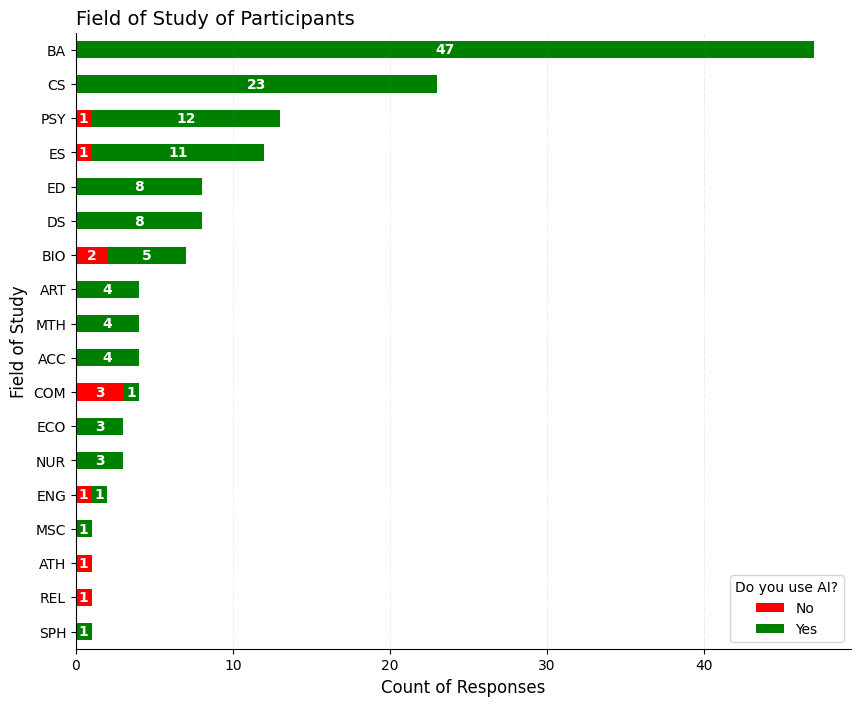

In [1199]:
# Change name of values in the field_of_study column
abbreviation_map ={
    "Computer Science": "CS",
    "Mathematics": "MTH",
    "Accounting": "ACC",
    "Anthropology": "ATH",
    "Art": "ART",
    "Biology": "BIO",
    "Business Administration": "BA",
    "Chemistry": "CHE",
    "Communication": "COM",
    "Data Science": "DS",
    "Economics": "ECO",
    "English": "ENG",
    "Education": "ED",
    "Exercise Science": "ES",
    "French": "FR",
    "History":"HIS",
    "Music":"MSC",
    "Political Science":"POL",
    "Psychology":"PSY",
    "Religion":"REL",
    "Spanish":"SPH",
    "Nursing":"NUR",
    "Theatre":"THE"
}

df["Field_of_study"] = df["Field_of_study"].map(abbreviation_map)

# Create a pivot table to count "Yes" and "No" for each field of study
pivot_table = df.pivot_table(index="Field_of_study", columns="AI_use", aggfunc="size", fill_value=0)

# Order the rows based on the sum of Yes and No responses
pivot_table["Total"] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values(by="Total", ascending=False)

# Drop the column, only for sorting
pivot_table = pivot_table.drop(columns="Total")

# Plotting a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))
pivot_table.plot(kind="barh", stacked=True, color=["red", "green"], ax=ax)

# Adding a grid
ax.grid(visible=True, color="grey", linestyle="-.", linewidth=0.5, alpha=0.2, axis="x")

# Add annotations to the bars
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(p.get_x() + width / 2, p.get_y() + p.get_height() / 2, 
                f'{int(width)}', ha="center", va="center", color="white", fontweight="bold")

ax.set_title("Field of Study of Participants", loc="left", fontsize=14)
ax.set_xlabel("Count of Responses", fontsize=12)
ax.set_ylabel("Field of Study", fontsize=12)
ax.legend(title="Do you use AI?")
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.invert_yaxis()
plt.show()

Can we conclude that certain disciplines use AI more than others? To investigate this, we perform a Chi-Square Test to determine if a significant association exists between academic discipline and AI usage. Since several disciplines have very few responses, we exclude those with fewer than 10 observations to ensure a more accurate p-value in the statistical test.

While this approach helps improve the reliability of our results, it also introduces some limitations. Specifically, the reduced sample size for certain disciplines makes it challenging to generalize our findings across all fields. This limitation aligns with those discussed at the beginning of the notebook, where the small sample size may impact the representativeness of our conclusions.

In [1200]:
# Filter to exclude disciplines with les than 10 observations
discipline_counts = df['Field_of_study'].value_counts()
threshold = 10
disciplines_to_keep = discipline_counts[discipline_counts >= threshold].index
df_filtered = df[df['Field_of_study'].isin(disciplines_to_keep)]

# Step 1: Create the contingency table
contingency_table = pd.crosstab(df_filtered['Field_of_study'], df_filtered['AI_use'])
print("Contingency Table:")
print(contingency_table)

# Step 2: Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"\nChi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
if p < 0.05:
    print("\nThere is a significant association between academic discipline and AI usage (p < 0.05).")
else:
    print("\nThere is no significant association between academic discipline and AI usage (p >= 0.05).")

Contingency Table:
AI_use          No  Yes
Field_of_study         
BA               0   47
CS               0   23
ES               1   11
PSY              1   12

Chi-Square Statistic: 5.732871519161841
P-Value: 0.12535508817141006
Degrees of Freedom: 3
Expected Frequencies:
[[ 0.98947368 46.01052632]
 [ 0.48421053 22.51578947]
 [ 0.25263158 11.74736842]
 [ 0.27368421 12.72631579]]

There is no significant association between academic discipline and AI usage (p >= 0.05).


Keeping the discussed limitations in mind, the results of the Chi-Square test suggest that AI usage does not significantly depend on a student's field of study. This finding indicates that the use of AI is spread relatively evenly across disciplines, with no particular field showing a distinct pattern of AI adoption.

Now, let’s address the first research question: What percentage of students are using Generative AI in their academic activities?

To answer this, we’ll visualize the proportion of students who reported using AI in their academic life. This chart will provide a clear view of the overall adoption rate of AI tools among students, helping us understand the general trend in AI usage within the student population.

(-1.2026430116429268,
 1.1048877624591766,
 -1.0789320299937146,
 1.1210677586654776)

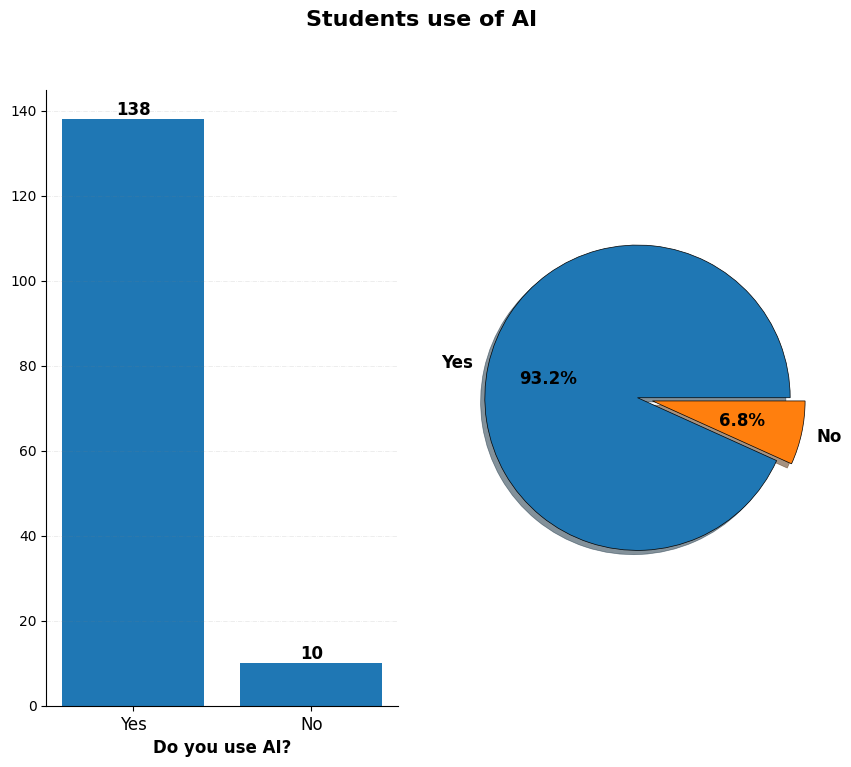

In [1201]:
# Count the value in the column
ai_use = df["AI_use"].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10,8))
fig.suptitle("Students use of AI", fontsize=16, fontweight="bold")
ax[0].bar(ai_use.index, ai_use.values)

ax[0].grid(visible=True, color="grey", linestyle="-.", linewidth=0.5, alpha=0.2, axis="y")

for i in range(len(ai_use.index)):
    ax[0].text(i, ai_use.values[i]+1, ai_use.values[i], ha = 'center', fontweight="bold", fontsize=12)

ax[0].tick_params(axis="x", labelsize=12)
ax[0].spines['right'].set_visible(False) 
ax[0].spines['top'].set_visible(False)
ax[0].set_xlabel("Do you use AI?", fontsize=12, fontweight="bold")

# Pie chart to show the percentages
explode = (0.1 , 0.0)
wedgeprops = {"linewidth": 0.5, 'edgecolor': "black"}
ax[1].pie(ai_use.values, labels=ai_use.index, 
          explode=explode, autopct="%1.1f%%", shadow=True, wedgeprops=wedgeprops,
          textprops={"fontsize": 12, "fontweight": "bold"})
ax[1].axis("equal")

As we can see, the proportion of students using AI in their academic life is significant, around 93%. This is quite an interesting result, showing a strong presence of AI in students' academic activities.

What about international students specifically? Well, Let’s dive in and find out...

(-1.1, 1.1, -1.1, 1.1)

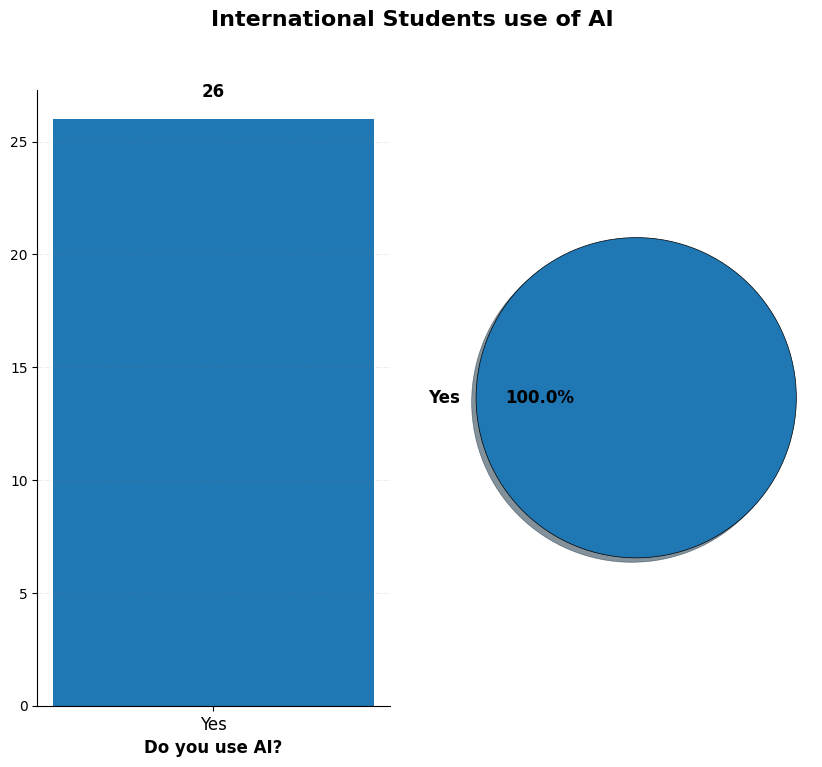

In [1202]:
# Take the subset of the original dataframe
df_inter = df[df["Language"] == "Non-Native English Speaker"]

# Count the value in the column
ai_use_int = df_inter["AI_use"].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10,8))
fig.suptitle("International Students use of AI", fontsize=16, fontweight="bold")
ax[0].bar(ai_use_int.index, ai_use_int.values)

ax[0].grid(visible=True, color="grey", linestyle="-.", linewidth=0.5, alpha=0.2, axis="y")

for i in range(len(ai_use_int.index)):
    ax[0].text(i, ai_use_int.values[i]+1, ai_use_int.values[i], ha = 'center', fontweight="bold", fontsize=12)

ax[0].tick_params(axis="x", labelsize=12)
ax[0].spines['right'].set_visible(False) 
ax[0].spines['top'].set_visible(False)
ax[0].set_xlabel("Do you use AI?", fontsize=12, fontweight="bold")

# Pie chart to show the percentages
wedgeprops = {"linewidth": 0.5, 'edgecolor': "black"}
ax[1].pie(ai_use_int.values, labels=ai_use_int.index, 
          autopct="%1.1f%%", shadow=True, wedgeprops=wedgeprops,
          textprops={"fontsize": 12, "fontweight": "bold"})
ax[1].axis("equal")

Although the sample size is relatively small compared to the total population of international students at Lyon College (n = 65), it still represents nearly 50% of that group. With this in mind, it's notable that 100% of the international students who participated in the survey report using AI in their academic life.

We've established that a large proportion of students use AI in their academic activities, but how frequently do they rely on these tools? This brings us to the second question of our research: How often do students at Lyon College use Generative AI tools in their academic pursuits?

Timestamp         0
Language          0
Field_of_study    2
AI_aw             0
AI_use            0
Frequency         0
Purpose           0
AI_tool           0
Consent           0
dtype: int64


C:\Users\Utente\AppData\Local\Temp\ipykernel_34836\2336248984.py:34: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_2 = df_yes.pivot_table(index="Frequency", columns="Field_of_study", aggfunc="size", fill_value=0)


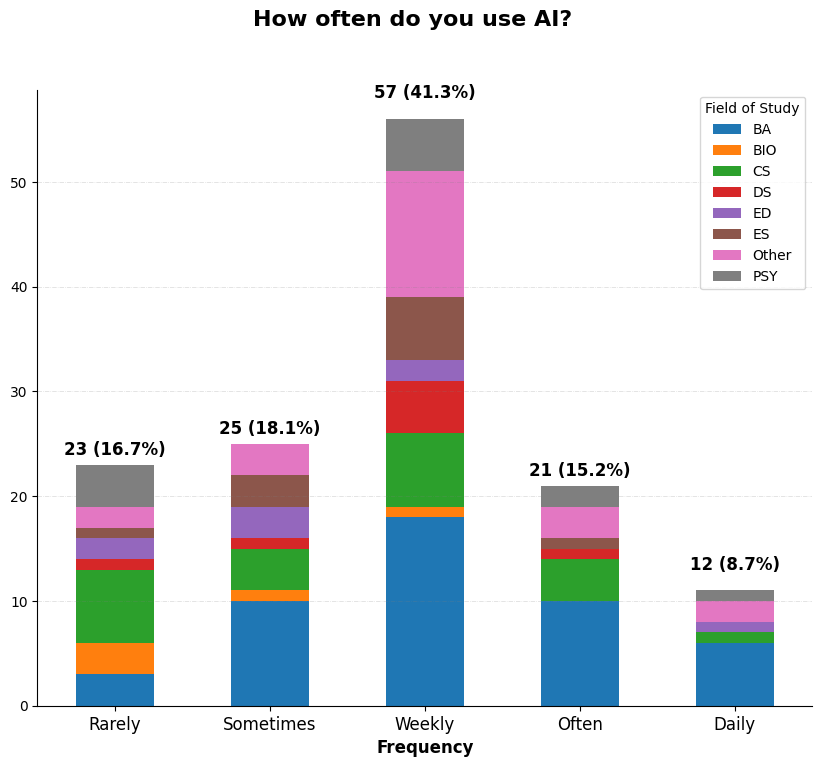

In [1203]:
# Take only students who use AI
df_yes = df[df["AI_use"] == "Yes"].copy()

value_map = {
    "1.0": "Rarely",
    "2.0": "Sometimes",
    "3.0": "Weekly",
    "4.0": "Often",
    "5.0": "Daily"
}

# Change data type to map value correctly
df_yes["Frequency"] = df_yes["Frequency"].astype(str)
df_yes["Frequency"] = df_yes["Frequency"].map(value_map)

# Define custom category order for the Frequency column
category_order = pd.CategoricalDtype(categories=["Rarely", "Sometimes", "Weekly", "Often", "Daily"], ordered=True)

# Apply the custom category to the Frequency column
df_yes["Frequency"] = df_yes["Frequency"].astype(category_order)

# Number of values in the frequency column
frequency = df_yes["Frequency"].value_counts().sort_index()

# Check for missing values
print(df_yes.isnull().sum())
df_yes = df_yes.dropna()

# Filter only Field of study with more than 5 observations
field_counts = df_yes["Field_of_study"].value_counts()
df_yes["Field_of_study"] = df_yes["Field_of_study"].apply(lambda x: x if field_counts[x] >= 5 else "Other")

# Create a pivot table to count "Yes" and "No" for each field of study
pivot_table_2 = df_yes.pivot_table(index="Frequency", columns="Field_of_study", aggfunc="size", fill_value=0)

# Create bar plot with the values
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plt.suptitle("How often do you use AI?", fontsize=16, fontweight="bold")

pivot_table_2.plot(kind="bar", stacked=True, ax=ax)
#ax.bar(frequency.index, frequency.values)
# Adding a grid
ax.grid(visible=True, color="grey", linestyle="-.", linewidth=0.5, alpha=0.3, axis="y")


total = frequency.values.sum()
for i in range(len(frequency.index)):
    value = frequency.values[i]
    percentage = (value / total) * 100
    ax.text(i, value + 1, f'{value} ({percentage:.1f}%)', ha='center', fontweight="bold", fontsize=12)

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.tick_params(axis="x", rotation=0, labelsize=12)
ax.set_xlabel(xlabel="Frequency", fontsize=12, fontweight="bold")
ax.legend(title="Field of Study")
plt.show()

As shown in the bar chart above, most students use AI on a weekly basis, with 41% following this trend. The distribution is right-skewed, indicating that students are generally more likely to use AI less frequently. Specifically, 34.8% of students report using AI rarely or sometimes, while 23.9% use it often or daily.

Let’s take a closer look at the differences in AI usage frequency between international and domestic students. Do international students use AI more frequently than domestic students? This is the question we aim to answer in the following analysis.

C:\Users\Utente\AppData\Local\Temp\ipykernel_34836\385362498.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df1.groupby(["Frequency", "Language"]).size().unstack(fill_value=0)


           Native English Speakers  Non-Native English Speakers
Frequency                                                      
Rarely                        21.3                         15.4
Sometimes                     18.0                         19.2
Weekly                        39.3                         38.5
Often                         12.3                         23.1
Daily                          9.0                          3.8


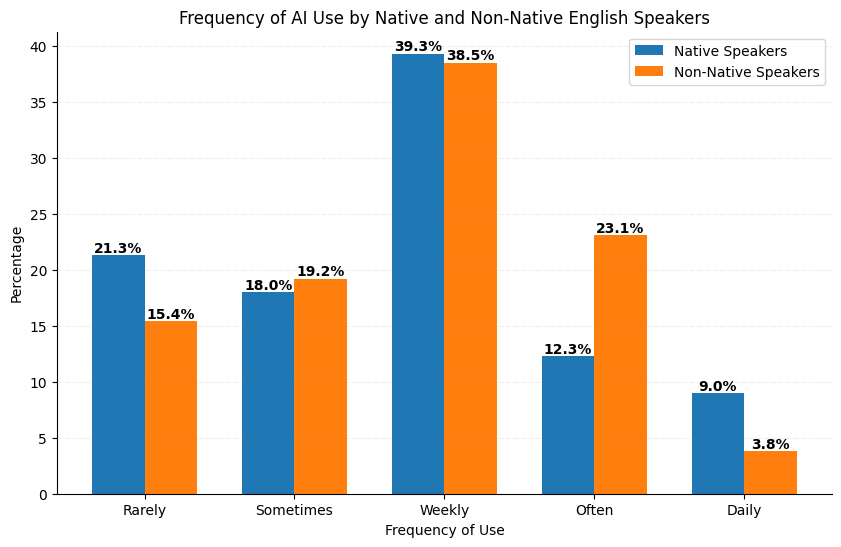

In [1204]:
df1 = df.copy()

value_map = {
    "1.0": "Rarely",
    "2.0": "Sometimes",
    "3.0": "Weekly",
    "4.0": "Often",
    "5.0": "Daily"
}

# Change data type to map value correctly
df1["Frequency"] = df1["Frequency"].astype(str)
df1["Frequency"] = df1["Frequency"].map(value_map)

# Define custom category order for the Frequency column
category_order = pd.CategoricalDtype(categories=["Rarely", "Sometimes", "Weekly", "Often", "Daily"], ordered=True)

# Apply the custom category to the Frequency column
df1["Frequency"] = df1["Frequency"].astype(category_order)

grouped_data = df1.groupby(["Frequency", "Language"]).size().unstack(fill_value=0)

# Calculate the total count for each language category
totals = grouped_data.sum(axis=0)

# Calculate percentage for each frequency use within each language category
percentage_table = (grouped_data / totals * 100).round(1)

# Rename columns for clarity, if needed
percentage_table.columns = ["Native English Speakers", "Non-Native English Speakers"]

# Display the final table
print(percentage_table)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width
bar_width = 0.35

# Define X-axis positions for each frequency
r1 = range(len(grouped_data.index))
r2 = [x + bar_width for x in r1]

# Plot bars
ax.bar(r1, percentage_table["Native English Speakers"], width=bar_width, label="Native Speakers") #, color='b'
ax.bar(r2, percentage_table["Non-Native English Speakers"], width=bar_width, label="Non-Native Speakers") # , color='orange'

# Adding a grid
ax.grid(visible=True, color="grey", linestyle="-.", linewidth=0.5, alpha=0.2, axis="y")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10, weight='bold')

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.set_xlabel('Frequency of Use')
ax.set_ylabel('Percentage')
ax.set_title('Frequency of AI Use by Native and Non-Native English Speakers')
ax.set_xticks([r + bar_width / 2 for r in range(len(grouped_data.index))])
ax.set_xticklabels(grouped_data.index)

# Add legend
ax.legend()

# Show plot
plt.show()

In [1205]:
# Separate the data by student type
domestic_students = df[df["Language"] == "Native English Speaker"]["Frequency"]
international_students = df[df["Language"] == "Non-Native English Speaker"]["Frequency"]

# Perform the Mann-Whitney U Test
stat, p_value = mannwhitneyu(domestic_students, international_students, alternative='two-sided')

# Output the test results
print("Mann-Whitney U Test")
print("U statistic:", stat)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in AI usage frequency between Domestic and International students.")
else:
    print("There is no significant difference in AI usage frequency between Domestic and International students.")

Mann-Whitney U Test
U statistic: 1477.5
p-value: 0.5708997876164856
There is no significant difference in AI usage frequency between Domestic and International students.


To compare the difference in AI usage frequency between international and domestic students, we applied the Mann-Whitney U test, a non-parametric test suited for comparing two independent groups when the data may not be normally distributed. This test evaluates whether there is a statistically significant difference in the distribution of usage frequencies between the two groups.

The results of the Mann-Whitney U test indicate that the difference in AI usage frequency between international and domestic students is not statistically significant (p > 0.05). This suggests that, on average, both groups use AI tools at a similar rate, with no meaningful difference in frequency.

This finding is further illustrated in the bar chart above, where we can observe that the percentages for each frequency category (e.g., daily, weekly, rarely) are quite similar for both groups, reinforcing that AI usage patterns do not markedly differ between international and domestic students.

Here we look at the distribution of AI usage frequency by field of study, showing the percentage of students in each subject area who use AI at different frequencies. The code below displays the first five observations of this table for reference. Given the small sample sizes across most fields of study, this analysis should be interpreted with caution, as it may not yield highly reliable or generalizable insights.

In [1206]:
# Group the relevant columns
group = df.groupby(["Field_of_study", "Frequency"]).size()
group = group.reset_index(name='Count')

# Calculate the total number of responses in a field of study
total_counts = group["Field_of_study"].value_counts()

# Create a new column total
group["Total"] = group["Field_of_study"].map(total_counts)

# Calculate the percentage for each field of study
group["Percentage"] = round((group["Count"]*100)/group["Total"], 2)
group.head()

,Field_of_study,Frequency,Count,Total,Percentage
0,ACC,1.0,1,3,33.33
1,ACC,2.0,1,3,33.33
2,ACC,3.0,2,3,66.67
3,ART,3.0,2,3,66.67
4,ART,4.0,1,3,33.33


Now let's tackle the third research question: "For which academic tasks or goals are students using Generative AI?" This question allows us to explore the specific purposes for which students leverage AI tools, such as support in writing, brainstorming ideas, or solving complex problems.

In the survey, students had the option to select "Other" and specify their own unique purposes for using AI. As a result, we received a wide range of single-use responses that were difficult to group meaningfully. For the sake of clarity and analysis, we decided to exclude these individual responses and focus only on purposes with more than 20 occurrences. This approach allows us to identify the most common and impactful ways students are using AI in their academic activities.

['Proofreading and Grammar Checking' ' Generating Ideas or Brainstorming'
 ' Learning and Studying new topics' ' Coding or Debugging Assistance'
 'Completing Assignments' ' Language Translation'
 ' Solving Mathematical Problems' 'Generating Ideas or Brainstorming'
 ' Organizing Notes and Information']


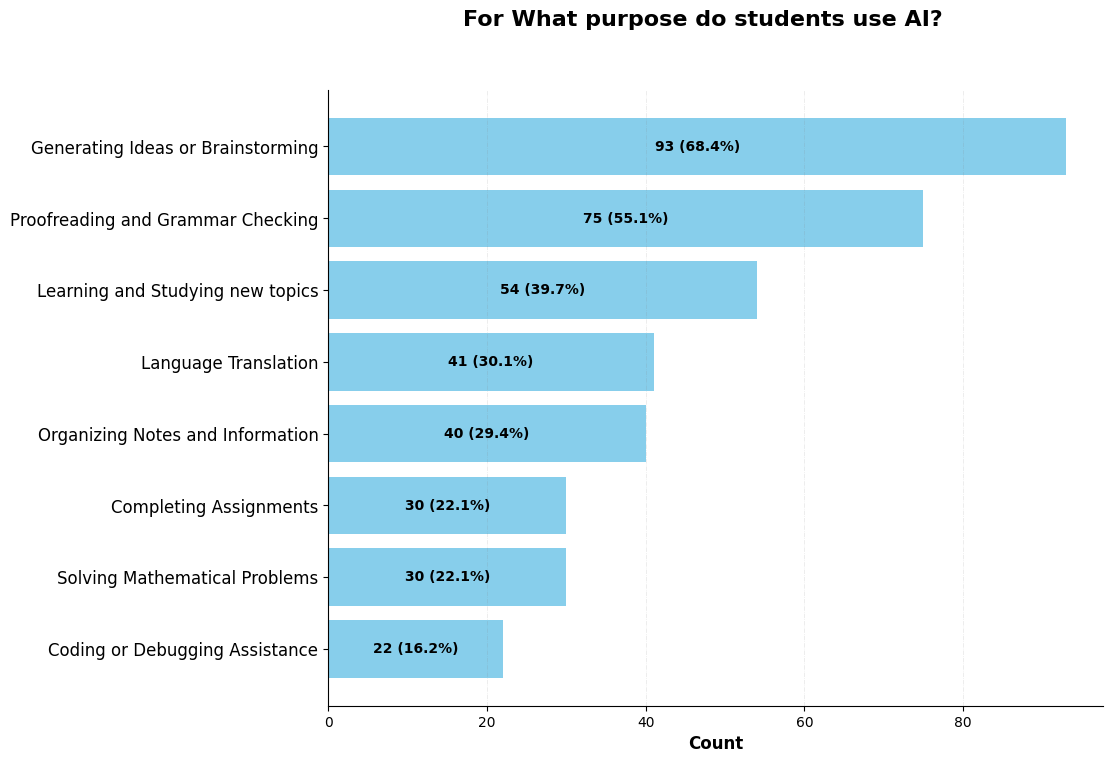

In [1207]:
# Take a look at the column we want to analyze
df_yes["Purpose"].head()

# Create a row for each single purpose for analysis
df_yes["Purpose_split"] = df_yes["Purpose"].str.split(",")
df_yes_exp = df_yes.explode("Purpose_split")

# Consider only purposes with more than 20 occurencies
field_counts = df_yes_exp["Purpose_split"].value_counts()
fields_to_keep = field_counts[field_counts >= 20].index
df_yes_exp = df_yes_exp[df_yes_exp["Purpose_split"].isin(fields_to_keep)]

print(df_yes_exp["Purpose_split"].unique())
# Remove extra spaces to avoid splits
df_yes_exp["Purpose_split"] = df_yes_exp["Purpose_split"].str.strip()


# Count occurencies 
count_purpose = df_yes_exp["Purpose_split"].value_counts()


fig, ax = plt.subplots(1,1,figsize=(10,8))
plt.suptitle("For What purpose do students use AI?", fontsize=16, fontweight="bold")
ax.barh(count_purpose.index, count_purpose.values, color='skyblue')

# Adding a grid
ax.grid(visible=True, color="grey", linestyle="-.", linewidth=0.5, alpha=0.2, axis="x")


total = len(df_yes)
ind = 0
for p in ax.patches:
    width = p.get_width()
    value = count_purpose.values[ind]
    perc = (value/total)*100
    ax.text(p.get_x() + width / 2, p.get_y() + p.get_height() / 2, 
            f'{int(width)} ({perc:.1f}%)', ha="center", va="center", color="black", fontweight="bold")
    ind += 1


ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.tick_params(axis="y", rotation=0, labelsize=12)
ax.set_xlabel(xlabel="Count", fontsize=12, fontweight="bold")
ax.invert_yaxis()
plt.show()

Great! It appears that many students primarily use AI for generating new ideas, with proofreading, grammar checking  and learning new topics also being popular among them. But this raises an interesting question: Could there be a relationship between a student's type (International vs. Domestic) and their purpose for using AI? For instance, do international students rely on AI for tasks like language translation more often than domestic students? To explore this, we’ll conduct a Chi-Square test in the code block below, which will help us determine if there are any statistically significant differences in AI usage purposes between these two groups.

In [1208]:
# Create a contingency table for AI purpose by Language (International vs. Domestic)
contingency_table = pd.crosstab(df_yes_exp["Language"], df_yes_exp["Purpose_split"])


#Perform the Chi-Square Test for Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Interpretation
if p < 0.05:
    print("\nThere is a significant difference in AI usage purposes between International and Domestic students.")
else:
    print("\nThere is no significant difference in AI usage purposes between International and Domestic students.")    


Chi-Square Statistic: 9.13399170030593
P-Value: 0.24317866035620742
Degrees of Freedom: 7
Expected Frequencies:
[[17.65714286 24.07792208 74.64155844 32.90649351 43.34025974 32.1038961
  60.19480519 24.07792208]
 [ 4.34285714  5.92207792 18.35844156  8.09350649 10.65974026  7.8961039
  14.80519481  5.92207792]]

There is no significant difference in AI usage purposes between International and Domestic students.


From these results, we can conclude, while acknowledging the limitations of this analysi, that, overall, the difference in AI usage purposes between international and domestic students is not highly pronounced. However, to gain deeper insight, let’s examine specific purposes more closely and visualize a percentage comparison between international and domestic students across various AI usage tasks.

Proportion Table (Percentage of AI Purposes by Student Type):
Purpose_split               Coding or Debugging Assistance  \
Language                                                     
Native English Speaker                            5.501618   
Non-Native English Speaker                        6.578947   

Purpose_split               Completing Assignments  \
Language                                             
Native English Speaker                    6.472492   
Non-Native English Speaker               13.157895   

Purpose_split               Generating Ideas or Brainstorming  \
Language                                                        
Native English Speaker                              24.595469   
Non-Native English Speaker                          22.368421   

Purpose_split               Language Translation  \
Language                                           
Native English Speaker                  9.708738   
Non-Native English Speaker             14.473684   

Pu

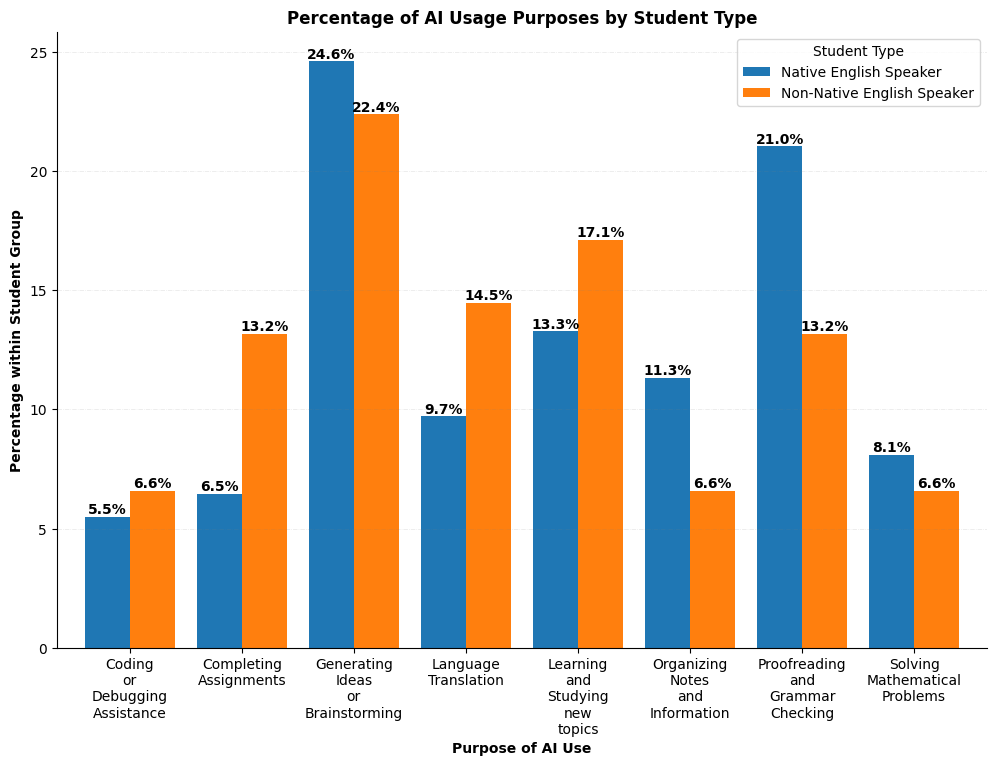

In [1209]:
proportion_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Convert to percentage for easier interpretation
proportion_table *= 100

print("Proportion Table (Percentage of AI Purposes by Student Type):")
print(proportion_table)

# Visualize the comparison
fig, ax = plt.subplots(1,1, figsize=(12,8))
proportion_table.T.plot(kind="bar", ax=ax, width=0.8) # .T transpose the table

# Adding a grid
ax.grid(visible=True, color="grey", linestyle="-.", linewidth=0.5, alpha=0.2, axis="y")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10, weight='bold')

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.set_title("Percentage of AI Usage Purposes by Student Type", fontweight="bold")
ax.set_xlabel("Purpose of AI Use", fontsize=10, fontweight="bold")
ax.set_ylabel("Percentage within Student Group", fontsize=10, fontweight="bold")
ax.set_xticklabels([label.replace(" ", "\n") for label in proportion_table.columns], rotation=0)
ax.legend(title="Student Type")
plt.show()

In general, both international and domestic students use AI for similar purposes and to a comparable extent. However, as shown in the graph above, certain tasks see a higher percentage of international students utilizing AI, such as, unsurprisingly, language translation. 

Now that we've explored how much students use AI and for what purposes, the next question is: what specific tools are they using? This brings us to our fourth research question: "Which Generative AI tools are most commonly used by students?"

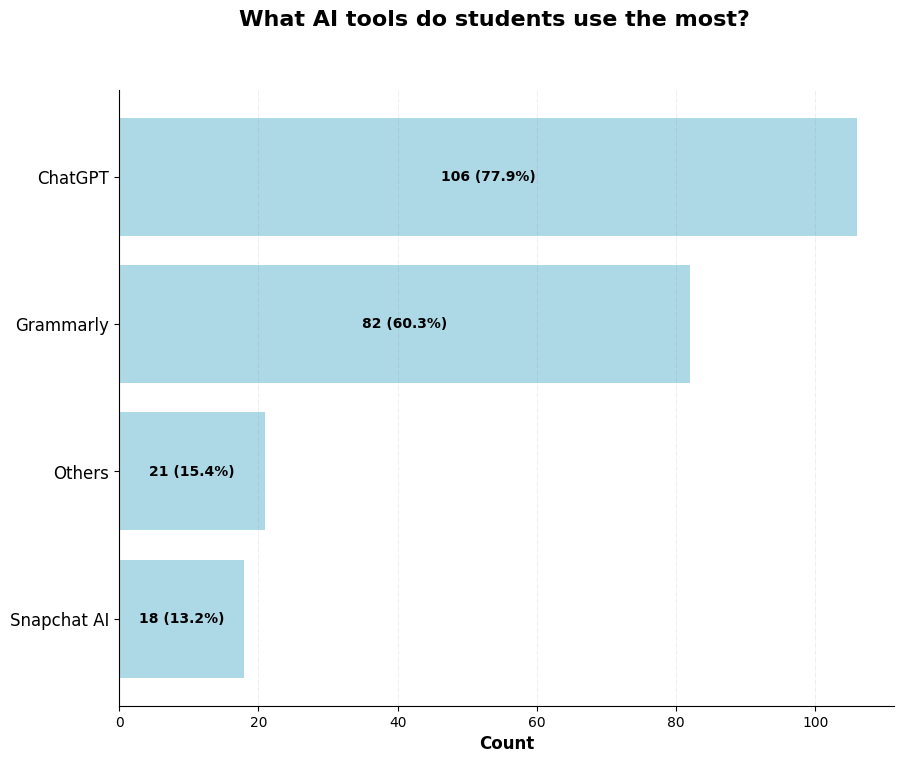

In [ ]:
# Column of interest
df_yes["AI_tool"].head()

# Create a row for each single tool for analysis
df_yes["Tools_split"] = df_yes["AI_tool"].str.split(",")
df_yes_tool = df_yes.explode("Tools_split")

# Filter more used tools
count = df_yes_tool["Tools_split"].value_counts()
df_yes_tool["Tools_split"] = df_yes_tool["Tools_split"].apply(lambda x: x if count[x] >= 10 else "Others")
"""keep_field = count[count >= 10].index
df_yes_tool = df_yes_tool[df_yes_tool["Tools_split"].isin(keep_field)]"""
df_yes_tool["Tools_split"] = df_yes_tool["Tools_split"].str.strip()

# Count for analysis
count_tool = df_yes_tool["Tools_split"].value_counts()

# Visualization
fig, ax = plt.subplots(1,1,figsize=(10,8))
plt.suptitle("What AI tools do students use the most?", fontsize=16, fontweight="bold")
ax.barh(count_tool.index, count_tool.values, color = "lightblue")

# Adding a grid
ax.grid(visible=True, color="grey", linestyle="-.", linewidth=0.5, alpha=0.2, axis="x")


total = len(df_yes)
ind = 0
for p in ax.patches:
    width = p.get_width()
    value = count_tool.values[ind]
    perc = (value/total)*100
    ax.text(p.get_x() + width / 2, p.get_y() + p.get_height() / 2, 
            f'{int(width)} ({perc:.1f}%)', ha="center", va="center", color="black", fontweight="bold")
    ind += 1


ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.tick_params(axis="y", rotation=0, labelsize=12)
ax.set_xlabel(xlabel="Count", fontsize=12, fontweight="bold")
ax.invert_yaxis()
plt.show()

Not surprisingly, the most widely used tool among students is also the most popular: ChatGPT by OpenAI. Grammarly, a well-known tool for proofreading and grammar checking, also shows high usage, which aligns with our earlier finding that proofreading and grammar correction are among the primary reasons students turn to AI. 

Answering the fifth research question, 'In which academic disciplines is Generative AI usage most prevalent among students?' proves challenging due to the limited sample sizes in certain fields of study. The code below displays the percentage of students using AI across various disciplines, but this is not intended as a definitive answer to the question. Given the pronounced limitation in sample sizes, any findings here should be viewed with caution.

In [1211]:
# Group the relevant columns and calculate counts for each combination of Field of Study and AI_use
group = df.groupby(["Field_of_study", "AI_use"]).size().unstack(fill_value=0)

# Calculate the total counts for each Field of Study
totals_per_field = group.sum(axis=1)

# Calculate percentages for each AI_use category within each Field of Study
percentage_table_AI_use = (group.T / totals_per_field).T * 100

# Round the percentages for clarity
percentage_table_AI_use = percentage_table_AI_use.round(1)

# Display the table
print(percentage_table_AI_use)

AI_use             No    Yes
Field_of_study              
ACC               0.0  100.0
ART               0.0  100.0
ATH             100.0    0.0
BA                0.0  100.0
BIO              28.6   71.4
COM              75.0   25.0
CS                0.0  100.0
DS                0.0  100.0
ECO               0.0  100.0
ED                0.0  100.0
ENG              50.0   50.0
ES                8.3   91.7
MSC               0.0  100.0
MTH               0.0  100.0
NUR               0.0  100.0
PSY               7.7   92.3
REL             100.0    0.0
SPH               0.0  100.0


## Conclusions
This study aimed to explore the usage of Generative AI among students at a small liberal arts college, focusing on the extent, frequency, purposes, and tools involved in their academic activities. Through a survey conducted at Lyon College, we discovered that a significant majority of students engage with Generative AI in their academic lives, with approximately 93% reporting AI usage. This high level of adoption indicates that AI has become an integral tool for students, regardless of discipline or background.

In terms of frequency, most students use AI on a weekly basis, with usage patterns showing a right-skewed distribution, indicating a tendency toward less frequent use among the student population. The comparison between domestic and international students revealed no statistically significant difference in AI usage frequency, suggesting that both groups incorporate AI into their academic routines at similar rates.

When examining the specific purposes for which students utilize AI, "Proofreading and Grammar Checking" emerged as one of the most common, reflecting AI’s perceived utility in enhancing written communication. Other popular uses included generating ideas and learning new topics, showing that students are leveraging AI as a versatile tool to support various academic tasks. Although international and domestic students generally use AI for similar purposes, international students displayed a higher reliance on AI for language translation, which aligns with their unique linguistic needs.

Regarding preferred tools, ChatGPT by OpenAI emerged as the most widely used, unsurprising given its prominence and functionality. Grammarly was also frequently used, further supporting our findings that language support is a key reason for AI usage among students.

However, our attempt to understand AI usage across different academic disciplines was limited by the sample sizes available within each field of study. While the data provides an initial insight, it does not allow us to draw definitive conclusions regarding discipline, specific patterns of AI usage. Future studies with larger and more diverse samples across disciplines would provide a clearer picture.

This study provides valuable insights into how students at a small college are integrating Generative AI into their academic practices, indicating broad adoption and diverse applications. For those interested in a more detailed analysis and additional context, further information will be available in a forthcoming paper that expands on these findings.